<a href="https://colab.research.google.com/github/e-k-a/AI/blob/main/%D0%BB%D0%B0%D0%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4 вариант: x1 + 0,5x2 + 2

In [ ]:
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def generate(n=200):
    point = []
    for _ in range(n):
        p1 = random.randint(-1000,1000)
        p2 = random.randint(-1000,1000)
        point.append([p1, p2])
    return point

In [ ]:
df_train = np.array(generate())
df_train_ans = np.array([val[0]+0.5*val[1]+2 for val in df_train])
df_test = np.array(generate(n=20))
df_test_ans = np.array([val[0]+0.5*val[1]+2 for val in df_test])

In [ ]:
def pred(df_train,df_train_ans, df_test):
    model = Sequential()
    model.add(Dense(units=1, input_shape=(2,), activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    fit = model.fit(df_train, df_train_ans, epochs=500, verbose=False)
    predict = model.predict(df_test)
    return fit, predict, model.get_weights()

In [ ]:
res = pred(df_train,df_train_ans, df_test)
print('Полученные результаты: \n')
for i in range(20):
  print(res[1][i][0],df_test_ans[i] )

1/1 [==============================] - 0s 104ms/step
Полученные результаты: 

553.5 553.5
238.5 238.5
458.0 458.0
252.5 252.5
-353.0 -353.0
-1011.5 -1011.5
589.5 589.5
-28.500006 -28.5
-132.5 -132.5
-318.5 -318.5
722.0 722.0
436.0 436.0
-589.0 -589.0
1197.5 1197.5
-128.0 -128.0
-839.0 -839.0
-692.5 -692.5
-969.5 -969.5
-760.0 -760.0
606.0 606.0


In [ ]:
res[2]

[array([[1. ],
        [0.5]], dtype=float32),
 array([1.9999942], dtype=float32)]

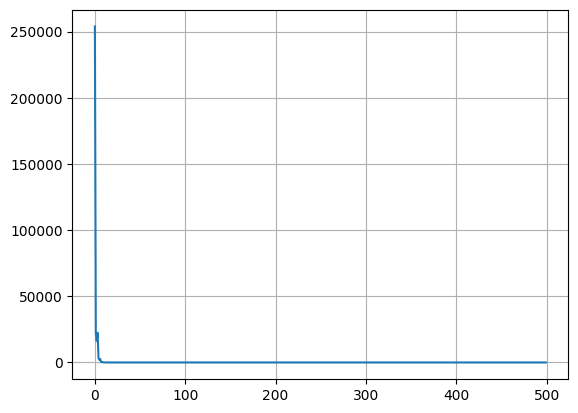

In [ ]:
plt.plot(res[0].history['loss'])
plt.grid(True)
plt.show()